In [ ]:
# !pip install catboost

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from datetime import datetime
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.svm import SVR, SVC
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor, CatBoostClassifier

In [ ]:
aqi = pd.read_csv("data.csv")
aqi = aqi.drop(columns=['stasiun'])
aqi = aqi.drop(columns=['max'])
aqi = aqi.drop(columns=['pm25'])
aqi = aqi.drop_duplicates()

In [ ]:
# aqi.apply(pd.isnull).sum()
nan_df = aqi[aqi.isna().any(axis=1)]
nan_df

,tanggal,pm10,so2,co,o3,no2,critical,categori
82,2010-03-24,NaN,7.0,41.0,99.0,29.0,O3,SEDANG
88,2010-03-30,44.0,6.0,33.0,NaN,12.0,PM10,BAIK
89,2010-03-31,58.0,5.0,57.0,NaN,14.0,PM10,SEDANG
90,2010-04-01,59.0,5.0,46.0,NaN,21.0,PM10,SEDANG
92,2010-04-03,37.0,4.0,18.0,NaN,10.0,PM10,BAIK
...,...,...,...,...,...,...,...,...
3762,2020-04-20,60.0,3.0,NaN,73.0,7.0,O3,SEDANG
3763,2020-04-21,46.0,4.0,NaN,35.0,10.0,PM10,BAIK
3773,2020-05-01,47.0,2.0,NaN,38.0,10.0,PM10,BAIK
3902,2020-09-07,NaN,23.0,6.0,64.0,12.0,PM25,SEDANG


In [ ]:
# aqi["pm10"] = aqi["pm10"].fillna(55.0)
# aqi["so2"] = aqi["so2"].fillna(18.0)
# aqi["co"] = aqi["co"].fillna(20.0)
# aqi["o3"] = aqi["o3"].fillna(19.0)
# aqi["no2"] = aqi["no2"].fillna(3.0)

aqi.dropna(inplace=True)

In [ ]:
# aqi.apply(pd.isnull).sum()/aqi.shape[0]
aqi.isnull().sum()

,0
tanggal,0
pm10,0
so2,0
co,0
o3,0
no2,0
critical,0
categori,0


In [ ]:
aqi.dtypes

,0
tanggal,object
pm10,float64
so2,float64
co,float64
o3,float64
no2,float64
critical,object
categori,object


In [ ]:
aqi

,tanggal,pm10,so2,co,o3,no2,critical,categori
0,2010-01-01,60.0,4.0,73.0,27.0,14.0,CO,SEDANG
1,2010-01-02,32.0,2.0,16.0,33.0,9.0,O3,BAIK
2,2010-01-03,27.0,2.0,19.0,20.0,9.0,PM10,BAIK
3,2010-01-04,22.0,2.0,16.0,15.0,6.0,PM10,BAIK
4,2010-01-05,25.0,2.0,17.0,15.0,8.0,PM10,BAIK
...,...,...,...,...,...,...,...,...
4378,2021-12-27,52.0,61.0,15.0,20.0,15.0,PM25,SEDANG
4379,2021-12-28,51.0,53.0,15.0,18.0,13.0,PM25,SEDANG
4380,2021-12-29,31.0,54.0,10.0,24.0,11.0,SO2,SEDANG
4381,2021-12-30,55.0,53.0,16.0,23.0,14.0,PM25,SEDANG


In [ ]:
aqi.index = pd.to_datetime(aqi.index)


In [ ]:
aqi.index

DatetimeIndex([          '1970-01-01 00:00:00',
               '1970-01-01 00:00:00.000000001',
               '1970-01-01 00:00:00.000000002',
               '1970-01-01 00:00:00.000000003',
               '1970-01-01 00:00:00.000000004',
               '1970-01-01 00:00:00.000000005',
               '1970-01-01 00:00:00.000000006',
               '1970-01-01 00:00:00.000000007',
               '1970-01-01 00:00:00.000000008',
               '1970-01-01 00:00:00.000000009',
               ...
               '1970-01-01 00:00:00.000004373',
               '1970-01-01 00:00:00.000004374',
               '1970-01-01 00:00:00.000004375',
               '1970-01-01 00:00:00.000004376',
               '1970-01-01 00:00:00.000004377',
               '1970-01-01 00:00:00.000004378',
               '1970-01-01 00:00:00.000004379',
               '1970-01-01 00:00:00.000004380',
               '1970-01-01 00:00:00.000004381',
               '1970-01-01 00:00:00.000004382'],
              dtype=

<Axes: >

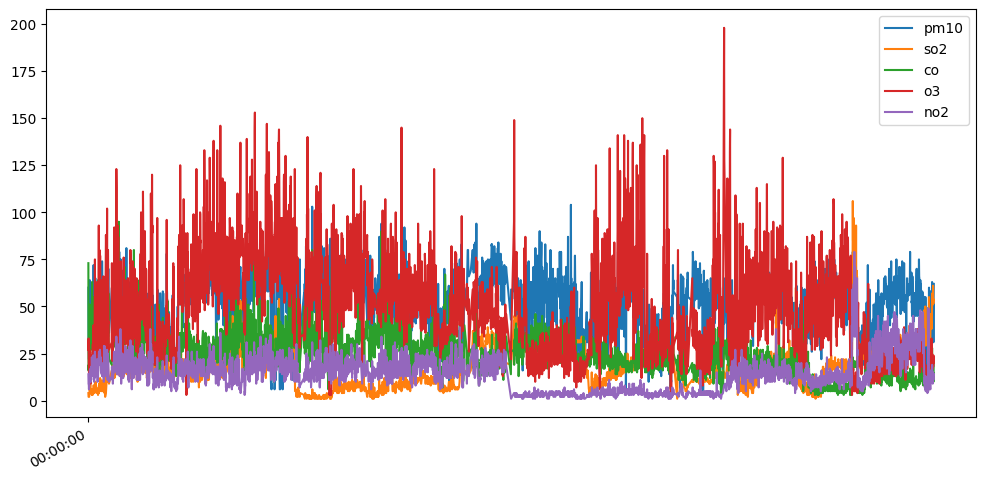

In [ ]:
aqi[["pm10","so2","co","o3","no2"]].plot(figsize=(12, 6))

<Axes: >

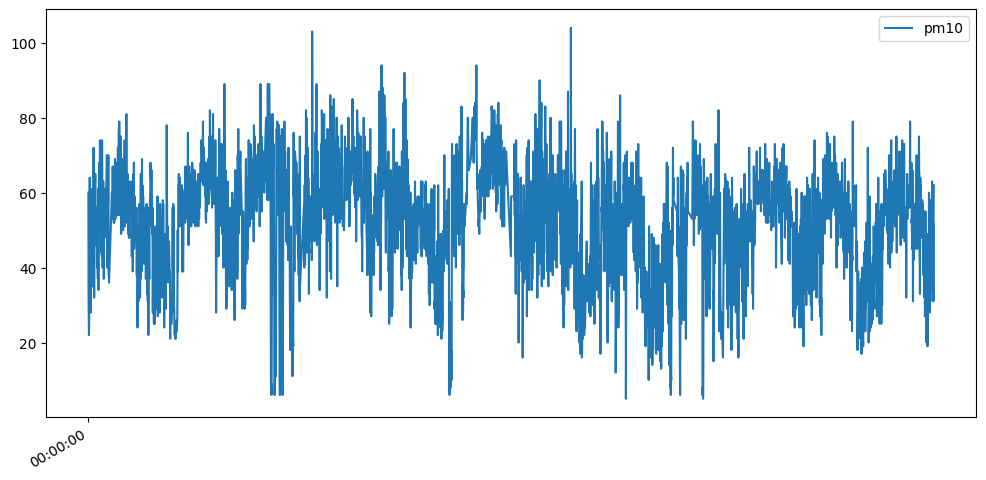

In [ ]:
aqi[["pm10"]].plot(figsize=(12, 6))

<Axes: >

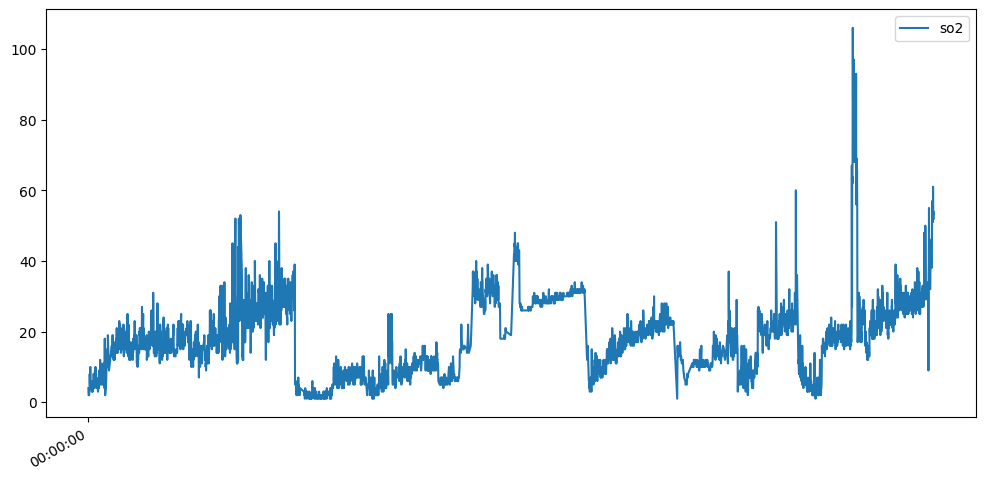

In [ ]:
aqi[["so2"]].plot(figsize=(12, 6))

<Axes: >

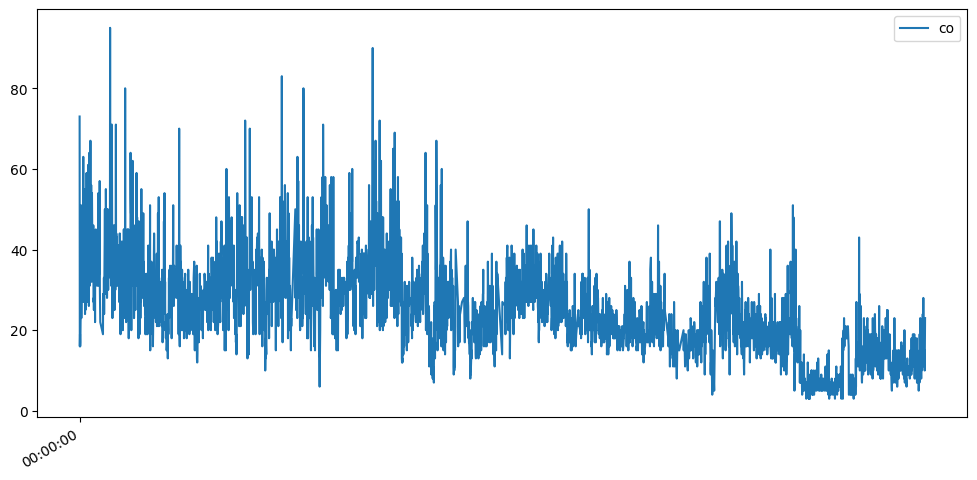

In [ ]:
aqi[["co"]].plot(figsize=(12, 6))

<Axes: >

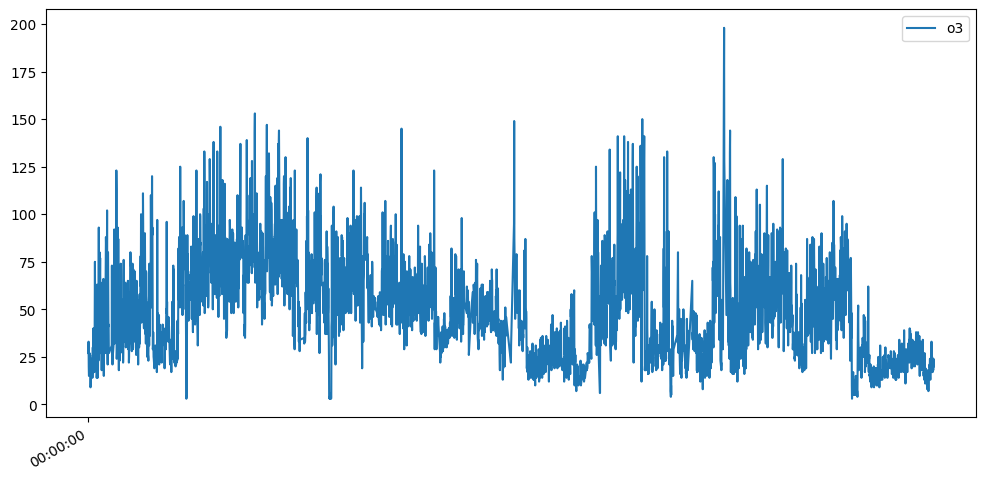

In [ ]:
aqi[["o3"]].plot(figsize=(12, 6))

<Axes: >

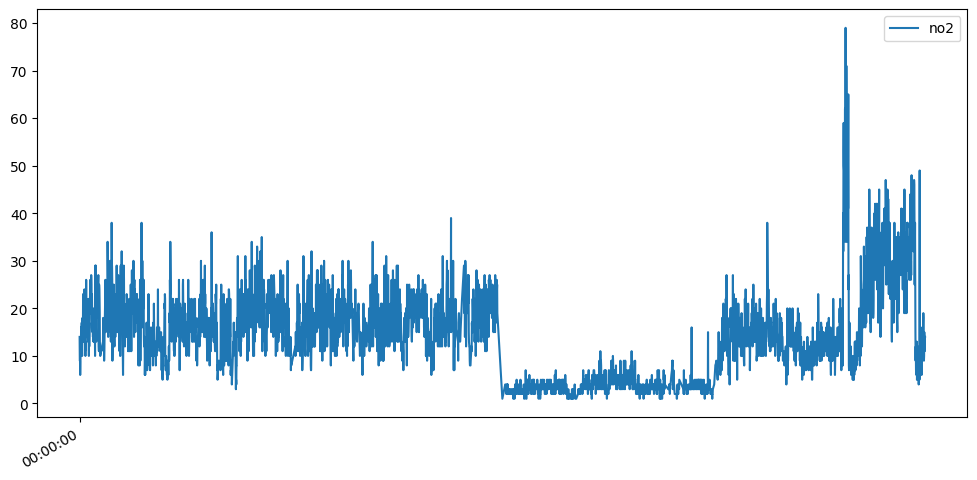

In [ ]:
aqi[["no2"]].plot(figsize=(12, 6))

Prepare Data for training

In [ ]:
# Encode the target variable
le = LabelEncoder()
aqi['categori'] = le.fit_transform(aqi['categori'])  # Encode categories: 'BAIK', 'SEDANG', 'TIDAK SEHAT'

# Define feature variables and target
X = aqi[['pm10', 'so2', 'co', 'o3', 'no2']]  # Features
y = aqi['categori']  # Target

Train Air Pollution Prediction Model Using Random Forest

In [ ]:
# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Model with Hyperparameter Tuning
model = RandomForestRegressor(
    n_estimators=500,
    max_depth=5,
    random_state=55
)
model.fit(X_train, y_train)

# Evaluate Model
y_pred = model.predict(X_test)
print("Random Forest Model Performance:")

mae = mean_absolute_error(y_test, y_pred)
print(f"\nMean Absolute Error (MAE): {mae:.4f}")

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse):.4f}")


feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Random Forest Model Performance:

Mean Absolute Error (MAE): 0.0293
R² Score: 0.9459
Mean Squared Error (MSE): 0.0133
Root Mean Squared Error (RMSE): 0.1153

Feature Importance:
  Feature  Importance
0    pm10    0.481078
3      o3    0.457973
4     no2    0.039184
1     so2    0.011769
2      co    0.009996


Train Air Pollution Prediction Model Using CatBoost

In [ ]:
# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Model with Hyperparameter Tuning
catboost_model = CatBoostRegressor(
    iterations=500,
    depth=5,
    random_seed=55,
    verbose=False
)
catboost_model.fit(X_train, y_train)

# Evaluate Model
y_pred_catboost = catboost_model.predict(X_test)
print("CatBoost Model Performance:")

mae = mean_absolute_error(y_test, y_pred_catboost)
print(f"\nMean Absolute Error (MAE): {mae:.4f}")

r2 = r2_score(y_test, y_pred_catboost)
print(f"R² Score: {r2:.4f}")

mse = mean_squared_error(y_test, y_pred_catboost)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse):.4f}")

# Feature Importance for CatBoost
feature_importance_catboost = pd.DataFrame({
    'Feature': X.columns,
    'Importance': catboost_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nCatBoost Feature Importance:")
print(feature_importance_catboost)

CatBoost Model Performance:

Mean Absolute Error (MAE): 0.0350
R² Score: 0.9559
Mean Squared Error (MSE): 0.0108
Root Mean Squared Error (RMSE): 0.1041

CatBoost Feature Importance:
  Feature  Importance
0    pm10   49.652130
3      o3   39.798756
4     no2    4.733992
2      co    3.786277
1     so2    2.028845


Train Air Pollution Prediction Model Using SVR

In [ ]:
# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svr_model = SVR(
    kernel='rbf',
    gamma=0.01,
    epsilon=0.05
)

svr_model.fit(X_train, y_train)

# Evaluate Model
y_pred_svr = svr_model.predict(X_test)
print("SVR Model Performance:")

mae = mean_absolute_error(y_test, y_pred_svr)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

mse = mean_squared_error(y_test, y_pred_svr)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse):.4f}")

r2 = r2_score(y_test, y_pred_svr)
print(f"R² Score: {r2:.4f}")

SVR Model Performance:
Mean Absolute Error (MAE): 0.0929
Mean Squared Error (MSE): 0.0321
Root Mean Squared Error (RMSE): 0.1791
R² Score: 0.8694


Model Prediction

In [ ]:
def predict_aqi(pm10, so2, co, o3, no2):
    """
    Predict AQI category based on input features.

    Parameters:
    - input_date: str, date in 'YYYY-MM-DD' format
    - pm10, so2, co, o3, no2: float, pollution levels

    Returns:
    - Predicted category (e.g., 'BAIK', 'SEDANG', 'TIDAK SEHAT')
    """
####input_date = pd.to_datetime(input_date)  # Ensure the date is in datetime format
    input_features = {
        'pm10': [pm10],
        'so2': [so2],
        'co': [co],
        'o3': [o3],
        'no2': [no2]
    }
    input_df = pd.DataFrame(input_features)
    predicted_label = model.predict(input_df)[0]
    return le.inverse_transform([predicted_label])[0]  # Convert back to original category label

# Example Prediction
example_prediction = predict_aqi(
#####input_date='2024-12-01',
    pm10=27,
    so2=2,
    co=19,
    o3=20,
    no2=9
)

print(f"Predicted AQI: {example_prediction}")

ValueError: y contains previously unseen labels: [0.01632698]